# Evaluation

this notebook contains all graphs included in the evaluation part of the thesis.

In [1]:
import sys
sys.path.insert(0, './../')

In [2]:
from preprocessing import TraceStats, BatchStats
from estimators import AE, GEE, UJ2A, SGD, PA, RLS
from visualization import plot_card, plot_sampling, plot_ml, plot_features, plot_tradeoff, df_to_pdf, plot_sampling_paper, plot_ml_paper
from itertools import product
from scipy.stats import linregress
import pandas as pd
from functools import partial
from cycler import cycler

import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# trace parameters used to create runs

runs = {}
traces = ['caida-2016', 'ucla-csd', 'caida-ddos', 'darpa-ddos']

runs['caida-2016'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['ucla-csd'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['50K', '100K', '150K'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['caida-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

runs['darpa-ddos'] = {'sampling_rates': [0.001, 0.005, 0.01, 0.02, 0.1],
                      'partitions': ['1S', '2S', '3S'],
                      'training_rates': [0.02, 0.05, 0.1, 0.2]}

## CAIDA-2016

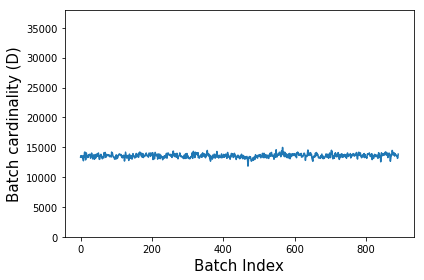

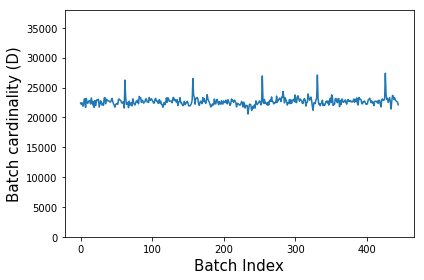

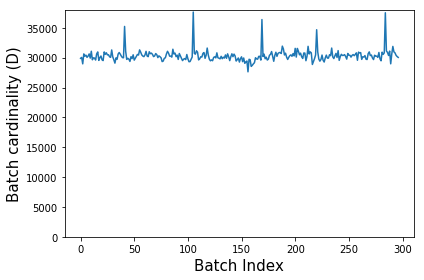

In [4]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-2016'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0, 38000)

plot_card(trace, sampling_rate, partitions, ylim)

<BarContainer object of 875 artists>

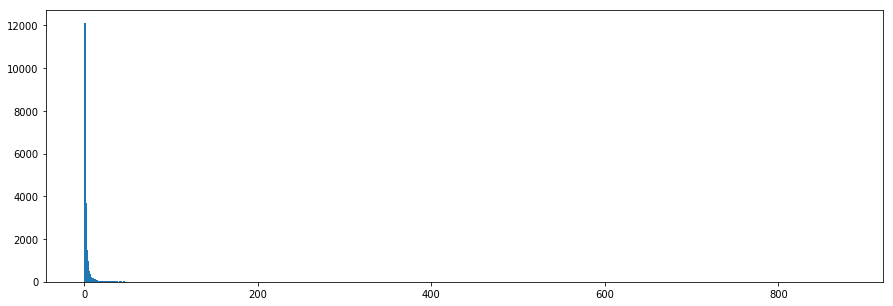

In [5]:
bs = BatchStats.from_pcap('/Users/yuvalnezri/PycharmProjects/CardEst/raw_data/file_00000_20160317145911.pcap', sampling_rate=1)

m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [6]:
total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = 100000

n = 3
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 4)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(20, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

81.12862369828314 51.615


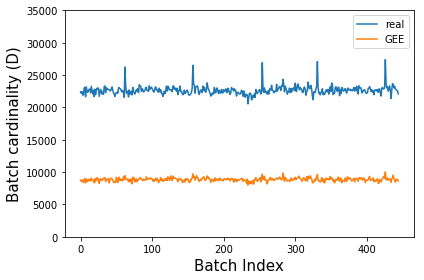

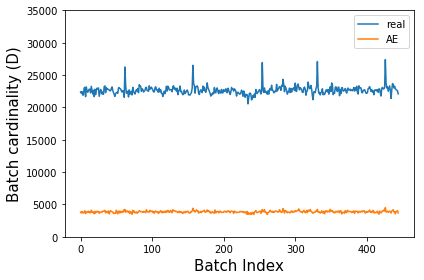

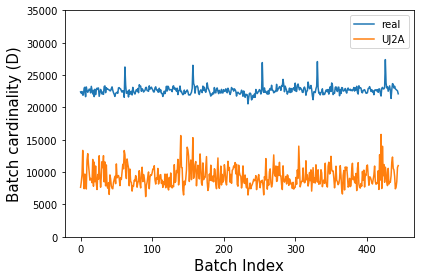

In [7]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'caida-2016'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 35000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
GEE,13803.032591,13793.587778,60.898845,17441.741718
UJ2A,13449.641100,13347.027071,58.902207,18629.615531
AE,18788.958196,18780.169235,82.923900,22878.719943


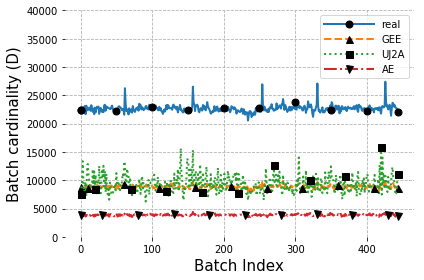

In [8]:
# one graph for paper

# show the performance of traditional algorithms. 150K, same graph

trace = 'caida-2016'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, UJ2A, AE]
model_names = ['GEE', 'UJ2A', 'AE']
ylim = (0, 40000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim)

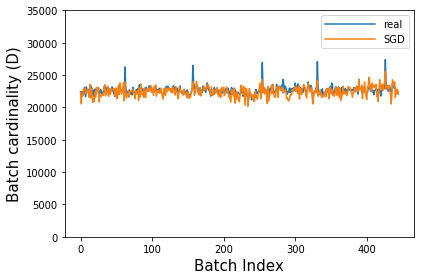

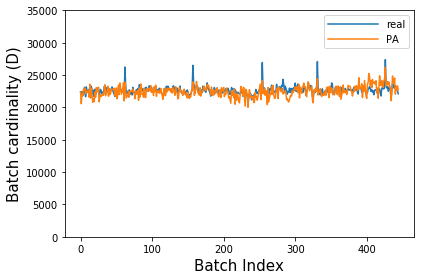

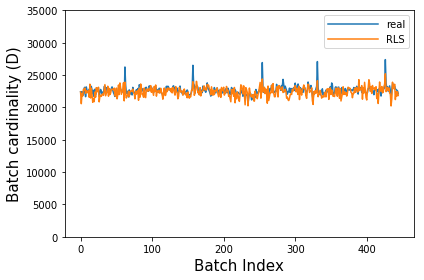

In [9]:
# compare online ML algs.

trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 35000)

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
SGD,703.663423,550.725106,2.416887,2872.701846
PA,751.271656,585.013691,2.568828,2797.992667
RLS,703.996842,549.217159,2.409428,2956.670196


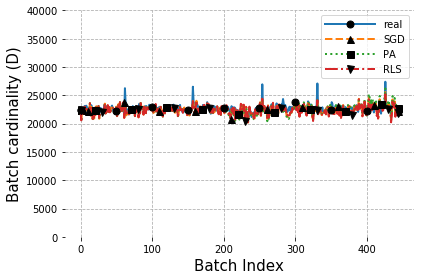

In [10]:
# compare online ML algs. # one graph for paper

trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 40000)

plot_ml_paper(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

In [11]:
trace = 'caida-2016'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,13803.0,13793.6,60.9,17441.7
AE,18789.0,18780.2,82.9,22878.7
UJ2A,13449.6,13347.0,58.9,18629.6
SGD,703.7,550.7,2.4,2872.7
PA,751.3,585.0,2.6,2798.0
RLS,704.0,549.2,2.4,2956.7


,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,2.416887,2.363993,3.702920,2.362605
PA,2.568828,2.500717,3.457315,2.500645
RLS,2.409428,2.363109,2.536693,2.361401


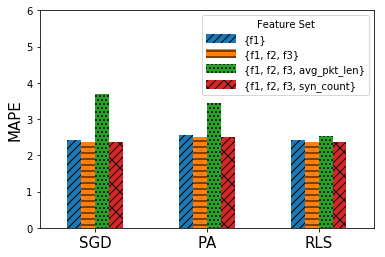

In [12]:
# different feature sets


trace = 'caida-2016'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets,
              models, model_names,legend='inside', ylim=(0,6))

,0.005,0.01,0.015
50K,5.165994,3.769700,2.653357
100K,3.618007,2.772884,2.244434
150K,3.242135,3.238835,1.805624


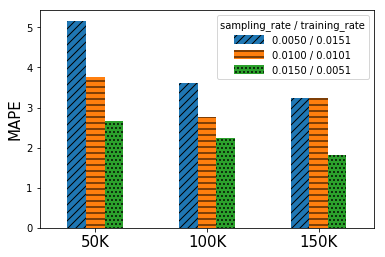

In [13]:
# training rate - sampling rate tradeoff


trace = 'caida-2016'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['50K', '100K', '150K']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside')

# CAIDA-DDOS

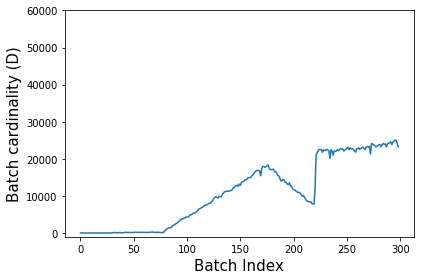

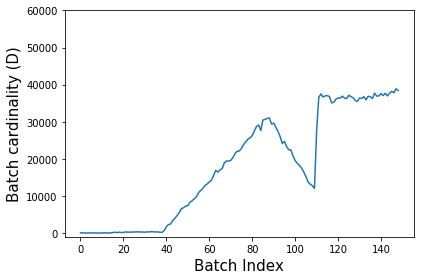

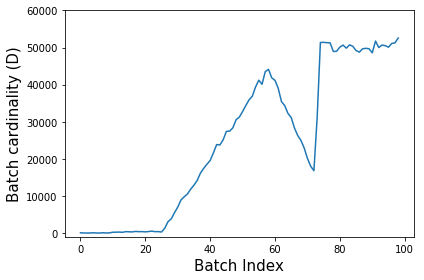

In [14]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'caida-ddos'
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (-1000, 60000)

plot_card(trace, sampling_rate, partitions, ylim)

### no attack batch

In [15]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('/Users/yuvalnezri/PycharmProjects/CardEst/raw_data/ddos_1_sec_00020_20070805001456.pcap', sampling_rate=1)

In [16]:
bs.batch_size

400

### attack batch

In [17]:
# plot 1st 100K batch frequency of frequencies

bs = BatchStats.from_pcap('/Users/yuvalnezri/PycharmProjects/CardEst/raw_data/ddos_1_sec_00299_20070805001935.pcap', sampling_rate=1)

In [18]:
bs.batch_size

172337

<BarContainer object of 129 artists>

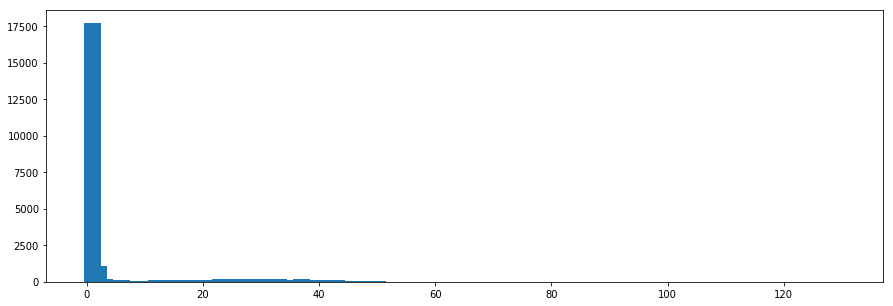

In [19]:
m = max(bs.histogram)
fig ,axes = plt.subplots(1,1, figsize=(15,5))

axes.bar(range(1,m+1), [bs.histogram[i] for i in range(1, m+1)], 3)

In [20]:
# heavy tailed parameters

total_flows = sum(bs.histogram[i] for i in range(1,m+1))

# total_packets = sum(i*bs.histogram[i] for i in range(1,m+1))
total_packets = bs.batch_size

n = 10
percent_of_flows_under = sum([bs.histogram[i] for i in range(1, 10)])/total_flows * 100
percent_of_packets_over = sum([i*bs.histogram[i] for i in range(11, m)])/total_packets * 100

print(percent_of_flows_under, percent_of_packets_over)

79.5447141228213 85.62177593900323


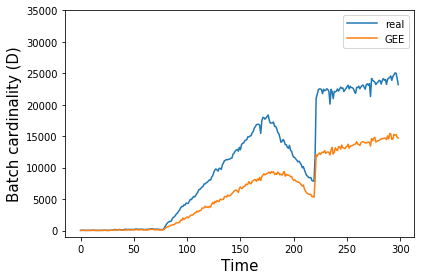

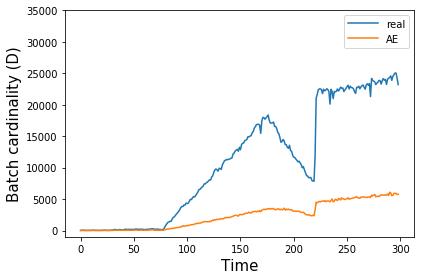

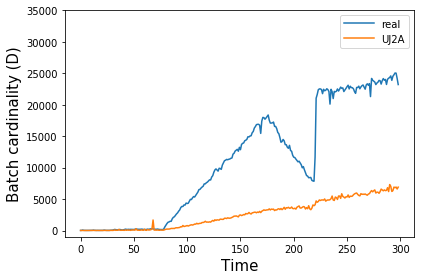

In [21]:
# show the performance of traditional algorithms. 1S
trace = 'caida-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (-1000, 35000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
GEE,5976.916610,4667.704493,41.830295,10422.828580
AE,11003.984001,8539.600587,75.074777,19141.262761
UJ2A,10774.432404,8362.333841,73.789654,18240.523871


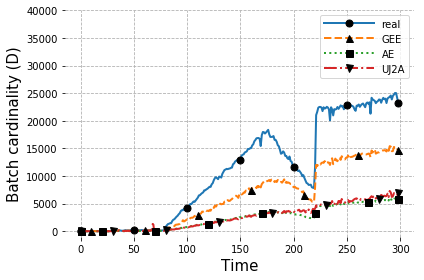

In [22]:
# show the performance of traditional algorithms. 1S
trace = 'caida-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (-1000, 40000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

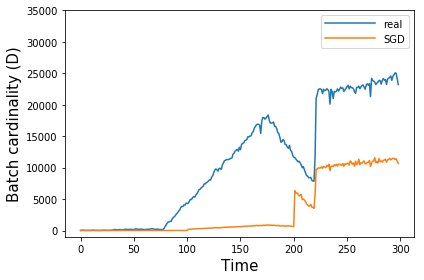

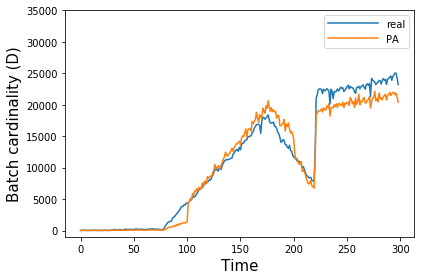

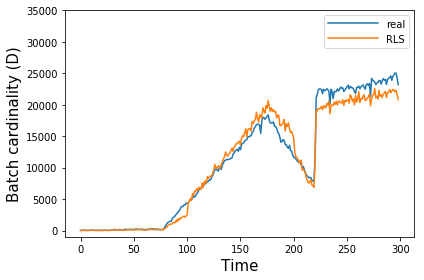

In [23]:
# compare online ML algs.

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
ylim = (-1000, 35000)
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

df_ml = plot_ml(trace, sampling_rate, training_rate, partition,
                    features, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
PA,1689.711449,1260.661472,25.425829,4024.058520
RLS,1485.193116,1100.189500,21.400885,4043.869009
SGD,9548.194489,7623.900135,82.945000,17474.717424


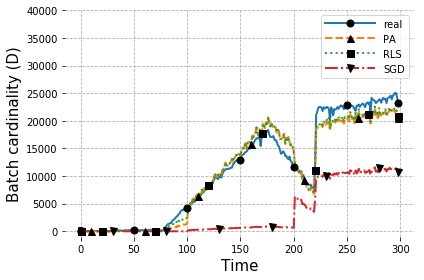

In [24]:
# compare online ML algs.

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
features = ['f_1']
ylim = (-1000, 40000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [25]:
trace = 'caida-ddos'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,5976.9,4667.7,41.8,10422.8
AE,11004.0,8539.6,75.1,19141.3
UJ2A,10774.4,8362.3,73.8,18240.5
SGD,9548.2,7623.9,82.9,17474.7
PA,1689.7,1260.7,25.4,4024.1
RLS,1485.2,1100.2,21.4,4043.9


,"('f_1',)","('f_1', 'sample_size')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,82.945000,66.081794,82.524992,69.359607,82.313797
PA,25.425829,22.673704,25.635644,25.140407,25.594010
RLS,21.400885,22.231912,23.124907,27.016271,23.097369


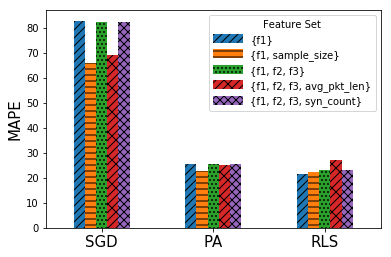

In [26]:
### different feature sets

trace = 'caida-ddos'
sampling_rate = 0.01
training_rate = 0.01
partition = '1S'
feature_sets = [('f_1',), ('f_1', 'sample_size'), ('f_1', 'f_2', 'f_3'), ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [SGD, PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside')

,0.005,0.01,0.015
1S,17.994416,23.875772,40.196706
2S,28.883332,39.985941,60.096500
3S,27.206595,30.460569,33.115894


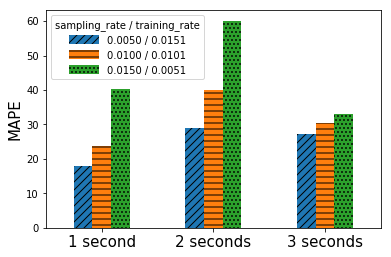

In [27]:
# training rate - sampling rate tradeoff

trace = 'caida-ddos'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside')

# DARPA-DDOS

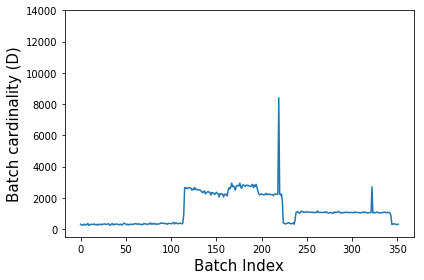

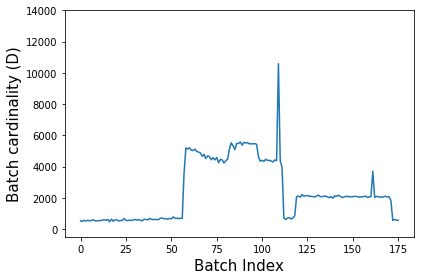

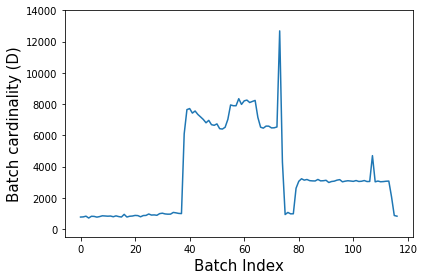

In [28]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'darpa-ddos'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = ((-500, 14000))
plot_card(trace, sampling_rate, partitions, ylim)

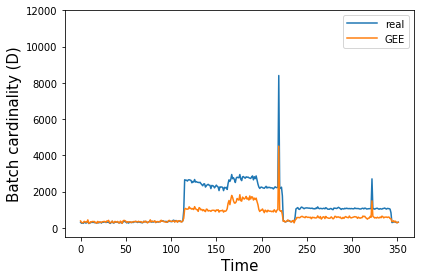

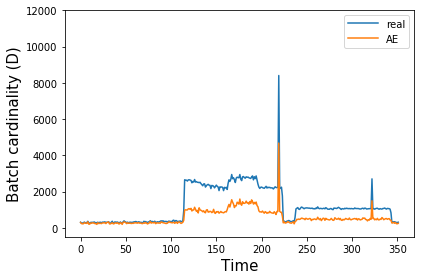

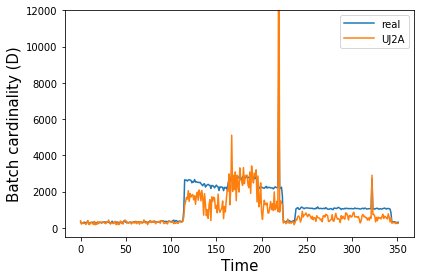

In [29]:
# show the performance of traditional algorithms. 

trace = 'darpa-ddos'
# sampling_rates = runs[trace]['sampling_rates']
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0975
ylim = ((-500, 12000))

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
GEE,800.882937,569.625825,33.772265,3898.134721
AE,873.440949,644.974913,41.416756,3729.808807
UJ2A,829.440495,451.967573,31.187520,10826.318374


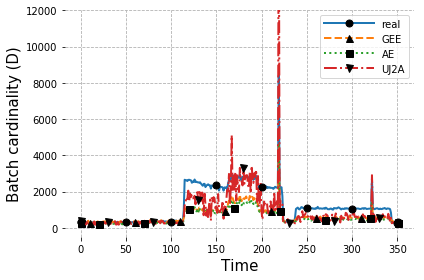

In [30]:
# show the performance of traditional algorithms. 1S
trace = 'darpa-ddos'
partition = '1S'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0975
ylim = (-500, 12000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

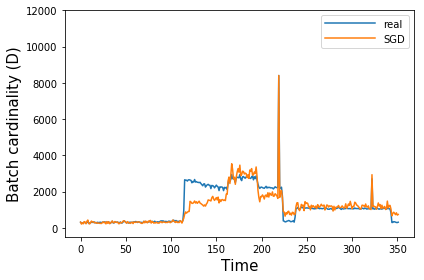

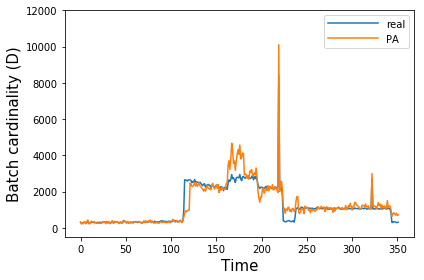

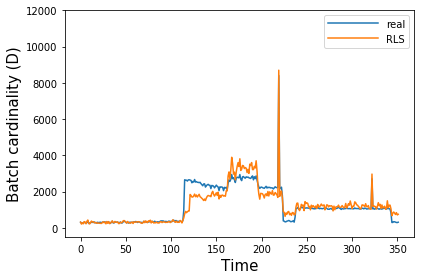

In [31]:
# compare online ML algs.

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = ((-500, 12000))

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim, xlabel='Time')

,RMSE,MAE,MAPE,MAXAE
PA,420.017772,220.035996,22.068749,1844.347201
RLS,403.952562,259.230409,22.373427,1884.767904
SGD,825.223209,570.466184,34.093324,3841.655325


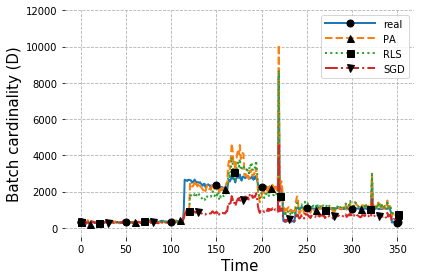

In [32]:
# compare online ML algs.

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'
features = ['f_1']
ylim = (-500, 12000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [33]:
trace = 'darpa-ddos'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,800.9,569.6,33.8,3898.1
AE,873.4,645.0,41.4,3729.8
UJ2A,829.4,452.0,31.2,10826.3
SGD,447.4,271.1,23.1,1907.2
PA,420.0,220.0,22.1,1844.3
RLS,404.0,259.2,22.4,1884.8


,"('f_1',)","('f_1', 'sample_size')","('f_1', 'syn_count')","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'avg_pkt_len')","('f_1', 'f_2', 'f_3', 'syn_count')"
PA,22.068749,37.072718,18.406609,22.366671,39.177254,18.666549
RLS,22.373427,45.431731,18.721347,23.354871,48.841801,19.534829


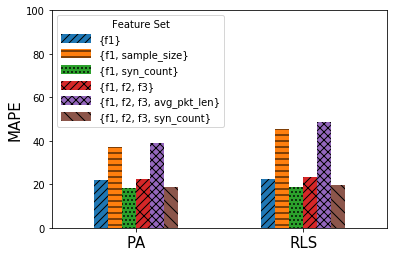

In [34]:
### different feature sets

trace = 'darpa-ddos'
sampling_rate = 0.051
training_rate = 0.05
partition = '1S'

feature_sets = [('f_1',), ('f_1', 'sample_size'), ('f_1', 'syn_count'),
                ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'avg_pkt_len'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]

models = [PA, RLS] # partial(SGD, learning_rate=10**-5),
model_names = ['PA', 'RLS'] # 'SGD', 

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside', ylim=(0,100))

,0.005,0.01,0.015
1S,19.583625,18.029346,13.813063
2S,16.011403,14.984546,12.764837
3S,15.990079,14.794027,12.357779


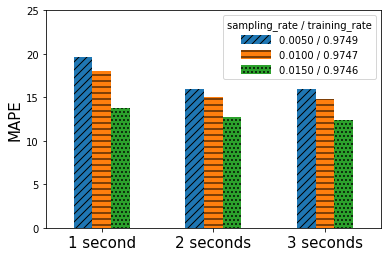

In [35]:
# training rate - sampling rate tradeoff

trace = 'darpa-ddos'
effective_sampling_rate = 0.975
sampling_rates = [0.005, 0.01, 0.015]
partitions = ['1S', '2S', '3S']
features = ['f_1']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name, legend='inside', ylim=(0,25))

# UCLA-CSD

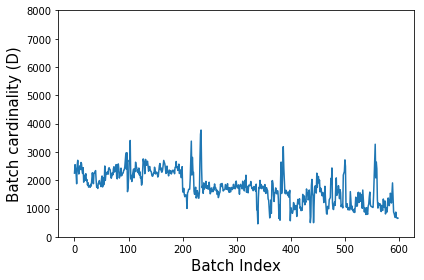

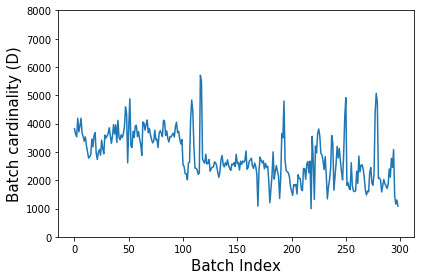

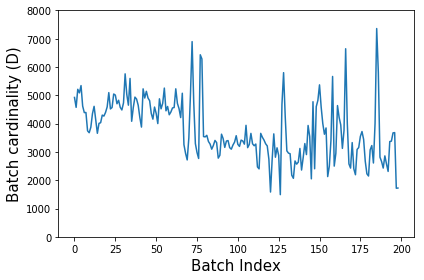

In [36]:
# create cardinality vs batch index graph (Ignore last batch)

trace = 'ucla-csd'
# choose random sampling rate(has no effect over this graph)
sampling_rate = runs[trace]['sampling_rates'][0]
partitions = runs[trace]['partitions']
ylim = (0,8000)

plot_card(trace, sampling_rate, partitions, ylim)

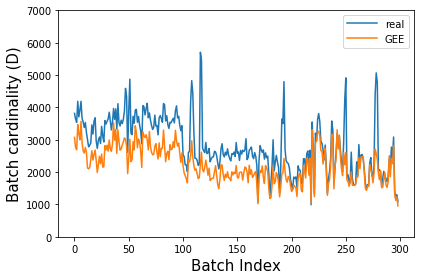

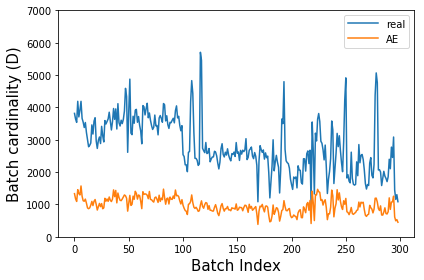

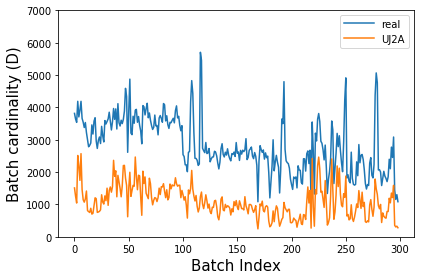

In [37]:
# show the performance of traditional algorithms. 150K, same graph

trace = 'ucla-csd'
# sampling_rates = runs[trace]['sampling_rates']
sampling_rate = 0.0198
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
ylim = (0, 7000)

df_stat = plot_sampling(trace, sampling_rate, partition, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
GEE,763.731370,600.241830,19.220403,3458.126647
AE,1977.409825,1863.592166,64.717655,4720.718390
UJ2A,1823.958048,1735.651470,61.940853,4460.156139


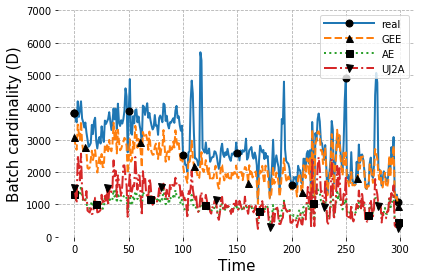

In [38]:
# show the performance of traditional algorithms. UCLA-CSD
trace = 'ucla-csd'
partition = '100K'
features = ['f_1']
models = [GEE, AE, UJ2A]
model_names = ['GEE', 'AE', 'UJ2A']
sampling_rate = 0.0198
ylim = (0, 7000)

plot_sampling_paper(trace, sampling_rate, partition, models, model_names, ylim, xlabel='Time')

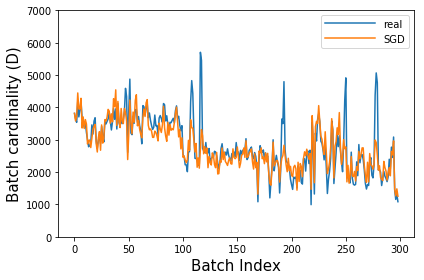

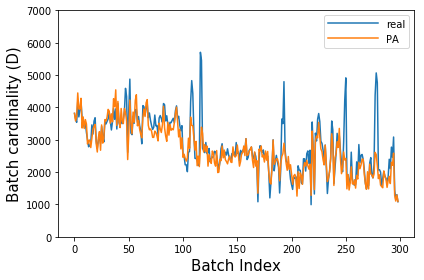

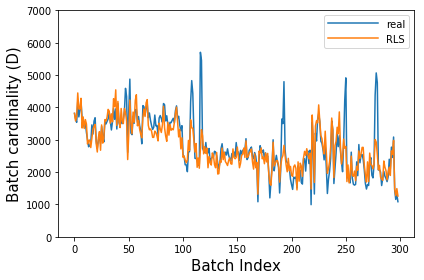

In [39]:
# compare online ML algs.

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'

features = ['f_1']
models = [partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']
ylim = (0, 7000)

df_ml = plot_ml(trace, sampling_rate, training_rate, partition, features, models, model_names, ylim)

,RMSE,MAE,MAPE,MAXAE
PA,474.004726,271.753294,8.970364,2910.798248
RLS,457.880555,279.440053,9.805650,2974.242042
SGD,462.596932,286.007934,10.096606,2998.022445


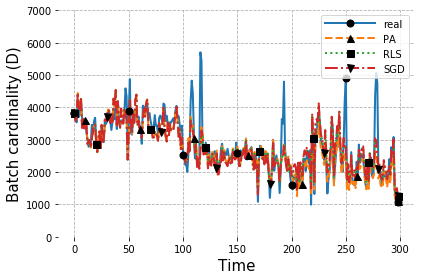

In [40]:
# compare online ML algs. paper version. UCLA-CSD

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
features = ['f_1']

ylim = (0, 7000)
models = [PA, RLS, SGD]
model_names = ['PA', 'RLS', 'SGD']

plot_ml_paper(trace, sampling_rate, training_rate, partition,
              features, models, model_names, ylim, xlabel='Time')

In [41]:
trace = 'ucla-csd'
df = df_stat.append(df_ml)
df = df.round(1)
df.index.name = 'Estimator'
df_to_pdf(df_stat.append(df_ml), trace + '_error',
          comma_separated_columns=['RMSE', 'MAE', 'MAPE', 'MAXAE'], gen_latex=True)
df

,RMSE,MAE,MAPE,MAXAE
Estimator,,,,
GEE,763.7,600.2,19.2,3458.1
AE,1977.4,1863.6,64.7,4720.7
UJ2A,1824.0,1735.7,61.9,4460.2
SGD,457.0,277.2,9.7,2972.0
PA,474.0,271.8,9.0,2910.8
RLS,457.9,279.4,9.8,2974.2


,"('f_1',)","('f_1', 'f_2', 'f_3')","('f_1', 'f_2', 'f_3', 'syn_count')"
SGD,9.693859,8.964832,8.896387
PA,8.970364,8.903106,8.784722
RLS,9.805650,9.105903,9.048428


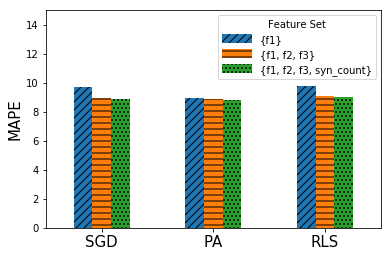

In [42]:
### different feature sets

trace = 'ucla-csd'
sampling_rate = 0.01
training_rate = 0.01
partition = '100K'
feature_sets = [('f_1',), ('f_1', 'f_2', 'f_3'),
                ('f_1', 'f_2', 'f_3', 'syn_count')]
models = [ partial(SGD, learning_rate=10**-5), PA, RLS]
model_names = ['SGD', 'PA', 'RLS']

plot_features(trace, sampling_rate, training_rate, partition, feature_sets, models, model_names, legend='inside', ylim=(0,15))

,0.005,0.01,0.015
50K,20.712554,28.213303,32.436516
100K,21.789147,24.630412,30.042450
150K,27.533529,22.174643,41.103222


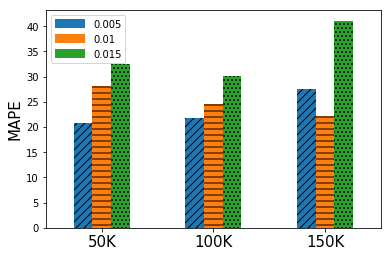

In [43]:
# training rate - sampling rate tradeoff

trace = 'ucla-csd'
effective_sampling_rate = 0.02
sampling_rates = [0.005, 0.01, 0.015]
partitions =  runs[trace]['partitions']
features = ['f_1','sample_size']
model = PA
model_name='PA'

plot_tradeoff(trace, effective_sampling_rate, sampling_rates, partitions, features, model, model_name)